C:\Users\BRUNO\Desktop\TCC\AMANDA\setup.py:214: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  dataValues = pd.DataFrame.as_matrix(dataValues)


Four Classes Expanding and One Class Fixed. Bidimensional.
100 batches of 1645 instances



METHOD: Static lp as classifier
Execution time:  4.1329526
Average error: 1.9769999999999897
Average macro-F1: 0.9796246598236599
Average micro-F1: 0.9807000000000001
Average Accuracy:  98.02300000000001
Standard Deviation:  0.417287670558333
Variance:  0.17412899999999984


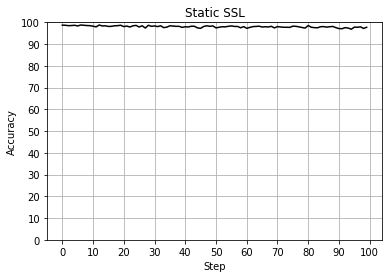

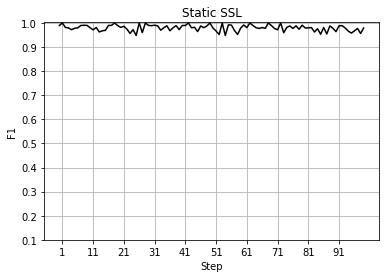

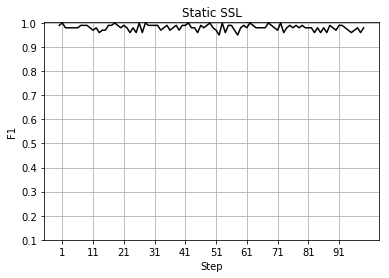




METHOD: Sliding lp as classifier
Execution time:  4.032691
Average error: 1.891900000000021
Average macro-F1: 0.979040415041858
Average micro-F1: 0.9794999999999999
Average Accuracy:  98.10809999999998
Standard Deviation:  0.43332134727012905
Variance:  0.18776738999999978


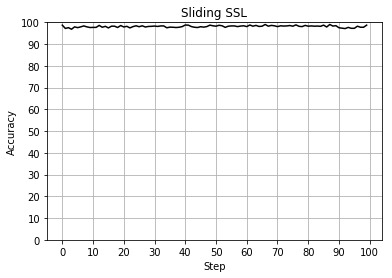

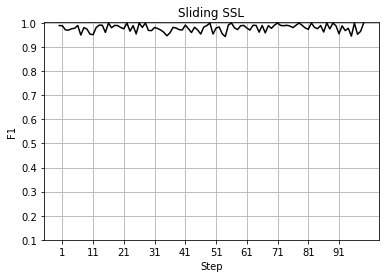

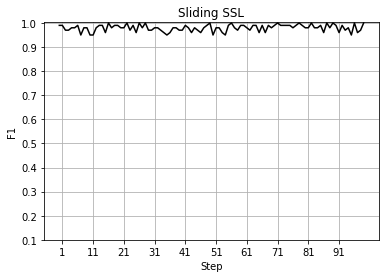




METHOD: Incremental lp as classifier
Execution time:  98.76992670000001
Average error: 1.8322000000000287
Average macro-F1: 0.9808901986283857
Average micro-F1: 0.9818000000000001
Average Accuracy:  98.16779999999997
Standard Deviation:  0.41108534393724167
Variance:  0.16899116000000028


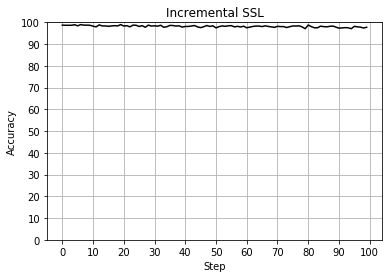

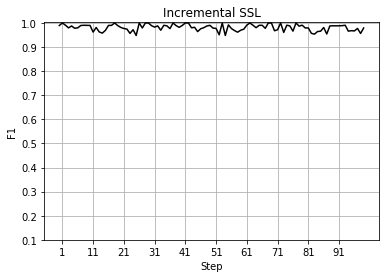

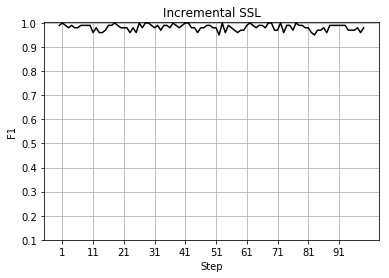




METHOD: lp as classifier and kde as core support extraction with cutting data method
Execution time:  23.573767199999992
Average error: 1.7227000000000032
Average macro-F1: 0.9806479596362387
Average micro-F1: 0.9810999999999999
Average Accuracy:  98.2773
Standard Deviation:  0.43240919277924694
Variance:  0.18697770999999994


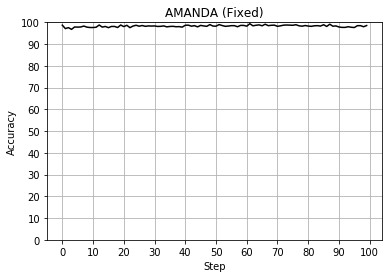

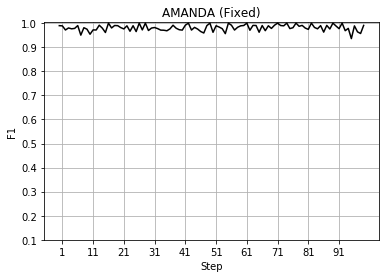

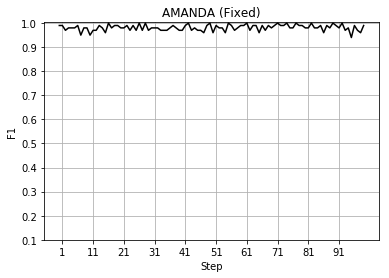




METHOD: lp as classifier and kde and Hellinger distance as dynamic CSE


C:\Users\BRUNO\Desktop\TCC\AMANDA\methods\amanda_dynamic.py:80: UserWarning: t=0 : Hellinger1 Invalid calculated alpha value: 1.1247368618240248
  warnings.warn("t={} : Hellinger1 Invalid calculated alpha value: {}".format(t,alpha))
C:\Users\BRUNO\Desktop\TCC\AMANDA\methods\amanda_dynamic.py:77: UserWarning: t=1 : Hellinger1 Invalid distance value(s): [2.25086359640126, 2.5291456466666333]
  warnings.warn("t={} : Hellinger1 Invalid distance value(s): {}".format(t,filtered))
C:\Users\BRUNO\Desktop\TCC\AMANDA\methods\amanda_dynamic.py:80: UserWarning: t=1 : Hellinger1 Invalid calculated alpha value: -0.9757910591608516
  warnings.warn("t={} : Hellinger1 Invalid calculated alpha value: {}".format(t,alpha))
C:\Users\BRUNO\Desktop\TCC\AMANDA\methods\amanda_dynamic.py:80: UserWarning: t=2 : Hellinger1 Invalid calculated alpha value: 1.298352606755729
  warnings.warn("t={} : Hellinger1 Invalid calculated alpha value: {}".format(t,alpha))
C:\Users\BRUNO\Desktop\TCC\AMANDA\methods\amanda_dynami

C:\Users\BRUNO\Desktop\TCC\AMANDA\methods\amanda_dynamic.py:80: UserWarning: t=29 : Hellinger1 Invalid calculated alpha value: 1.1143943173327446
  warnings.warn("t={} : Hellinger1 Invalid calculated alpha value: {}".format(t,alpha))
C:\Users\BRUNO\Desktop\TCC\AMANDA\methods\amanda_dynamic.py:77: UserWarning: t=30 : Hellinger1 Invalid distance value(s): [1.8142861393250571, 1.488140912474139]
  warnings.warn("t={} : Hellinger1 Invalid distance value(s): {}".format(t,filtered))
C:\Users\BRUNO\Desktop\TCC\AMANDA\methods\amanda_dynamic.py:80: UserWarning: t=30 : Hellinger1 Invalid calculated alpha value: -0.23699996352650277
  warnings.warn("t={} : Hellinger1 Invalid calculated alpha value: {}".format(t,alpha))
C:\Users\BRUNO\Desktop\TCC\AMANDA\methods\amanda_dynamic.py:77: UserWarning: t=32 : Hellinger1 Invalid distance value(s): [1.1310500756800432]
  warnings.warn("t={} : Hellinger1 Invalid distance value(s): {}".format(t,filtered))
C:\Users\BRUNO\Desktop\TCC\AMANDA\methods\amanda_dyna

C:\Users\BRUNO\Desktop\TCC\AMANDA\methods\amanda_dynamic.py:80: UserWarning: t=63 : Hellinger1 Invalid calculated alpha value: 1.1606753439630109
  warnings.warn("t={} : Hellinger1 Invalid calculated alpha value: {}".format(t,alpha))
C:\Users\BRUNO\Desktop\TCC\AMANDA\methods\amanda_dynamic.py:77: UserWarning: t=64 : Hellinger1 Invalid distance value(s): [1.5492577792869493, 2.0720479633460434]
  warnings.warn("t={} : Hellinger1 Invalid distance value(s): {}".format(t,filtered))
C:\Users\BRUNO\Desktop\TCC\AMANDA\methods\amanda_dynamic.py:80: UserWarning: t=64 : Hellinger1 Invalid calculated alpha value: -0.3964393089434013
  warnings.warn("t={} : Hellinger1 Invalid calculated alpha value: {}".format(t,alpha))
C:\Users\BRUNO\Desktop\TCC\AMANDA\methods\amanda_dynamic.py:80: UserWarning: t=65 : Hellinger1 Invalid calculated alpha value: 1.244168038974586
  warnings.warn("t={} : Hellinger1 Invalid calculated alpha value: {}".format(t,alpha))
C:\Users\BRUNO\Desktop\TCC\AMANDA\methods\amanda_

C:\Users\BRUNO\Desktop\TCC\AMANDA\methods\amanda_dynamic.py:77: UserWarning: t=93 : Hellinger1 Invalid distance value(s): [2.1971558240355584, 1.647425711714174]
  warnings.warn("t={} : Hellinger1 Invalid distance value(s): {}".format(t,filtered))
C:\Users\BRUNO\Desktop\TCC\AMANDA\methods\amanda_dynamic.py:80: UserWarning: t=93 : Hellinger1 Invalid calculated alpha value: -0.508077205501771
  warnings.warn("t={} : Hellinger1 Invalid calculated alpha value: {}".format(t,alpha))
C:\Users\BRUNO\Desktop\TCC\AMANDA\methods\amanda_dynamic.py:80: UserWarning: t=94 : Hellinger1 Invalid calculated alpha value: 1.0466032103242122
  warnings.warn("t={} : Hellinger1 Invalid calculated alpha value: {}".format(t,alpha))
C:\Users\BRUNO\Desktop\TCC\AMANDA\methods\amanda_dynamic.py:77: UserWarning: t=95 : Hellinger1 Invalid distance value(s): [2.1563809563051355, 1.9523326111891781]
  warnings.warn("t={} : Hellinger1 Invalid distance value(s): {}".format(t,filtered))
C:\Users\BRUNO\Desktop\TCC\AMANDA\m

AMANDA-DCP Hellinger | Mean keeping percentage=0.31 | Std keeping percentage=0.19
Execution time:  25.300584600000008
Average error: 1.889599999999973
Average macro-F1: 0.9799164539092482
Average micro-F1: 0.9802999999999998
Average Accuracy:  98.11040000000003
Standard Deviation:  0.43171036587045286
Variance:  0.18637384000000026


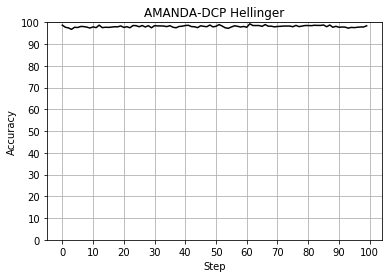

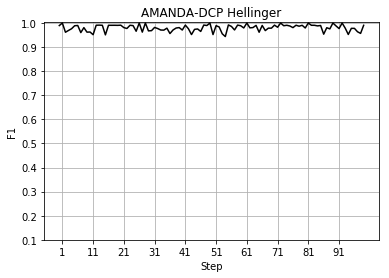

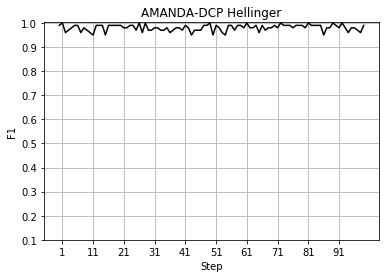




METHOD: lp as classifier and kde and Hellinger2 distance as dynamic CSE
AMANDA-DCP Hellinger2 | Mean keeping percentage=0.15 | Std keeping percentage=0.06
Execution time:  27.541687999999994
Average error: 1.9258000000000237
Average macro-F1: 0.9794138339115037
Average micro-F1: 0.9799
Average Accuracy:  98.07419999999998
Standard Deviation:  0.43259029115318787
Variance:  0.18713435999999986


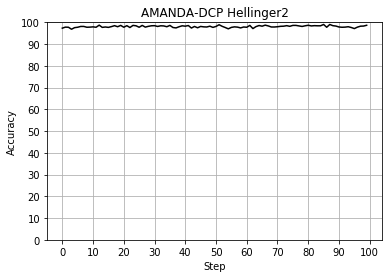

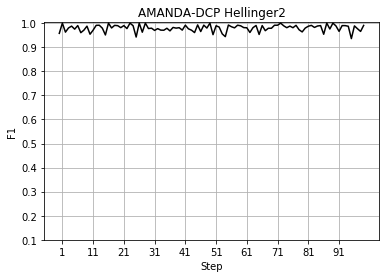

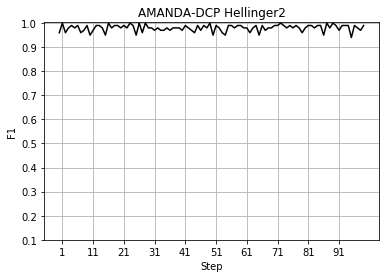




METHOD: lp as classifier and kde and BBD distance as dynamic CSE
AMANDA-DCP BBD - β = -10.000 | Mean keeping percentage=0.10 | Std keeping percentage=0.00
Execution time:  24.839909500000005
Average error: 1.9615000000000151
Average macro-F1: 0.9784255215952542
Average micro-F1: 0.9789999999999999
Average Accuracy:  98.03849999999998
Standard Deviation:  0.4698497100137447
Variance:  0.22075875


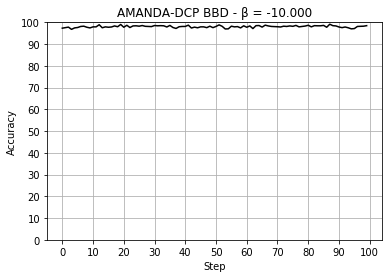

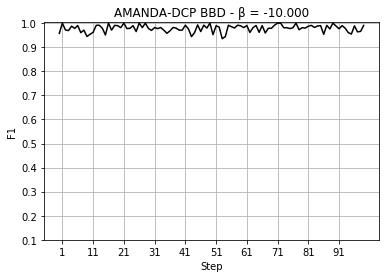

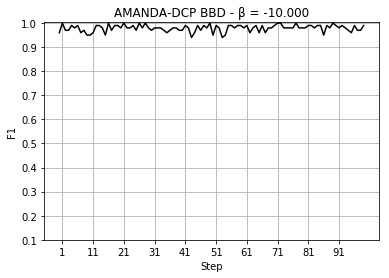




METHOD: lp as classifier and kde and BBD distance as dynamic CSE
AMANDA-DCP BBD - β = -2.000 | Mean keeping percentage=0.10 | Std keeping percentage=0.00
Execution time:  23.303266500000007
Average error: 1.9586000000000041
Average macro-F1: 0.9784255215952542
Average micro-F1: 0.9789999999999999
Average Accuracy:  98.0414
Standard Deviation:  0.46763237698003757
Variance:  0.21868003999999996


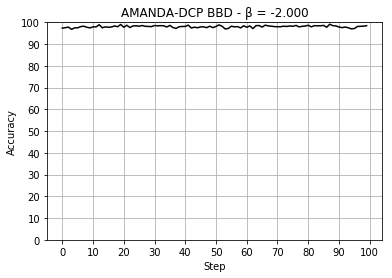

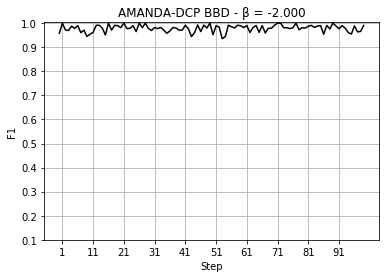

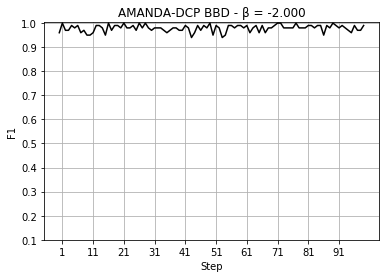




METHOD: lp as classifier and kde and BBD distance as dynamic CSE
AMANDA-DCP BBD - β = -0.500 | Mean keeping percentage=0.11 | Std keeping percentage=0.01
Execution time:  24.956687600000038
Average error: 1.8944999999999936
Average macro-F1: 0.9796528136445092
Average micro-F1: 0.9800999999999999
Average Accuracy:  98.1055
Standard Deviation:  0.472335421072779
Variance:  0.22310074999999943


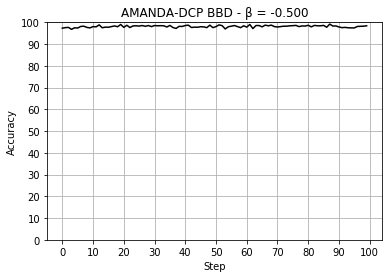

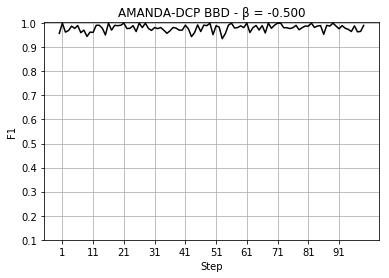

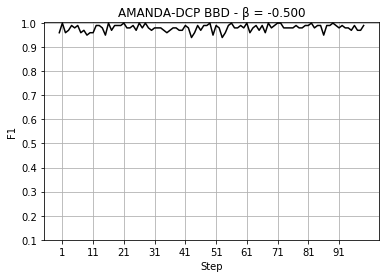




METHOD: lp as classifier and kde and BBD distance as dynamic CSE
AMANDA-DCP BBD - β = -0.010 | Mean keeping percentage=0.22 | Std keeping percentage=0.09
Execution time:  26.35437429999996
Average error: 1.851600000000019
Average macro-F1: 0.9797227853858648
Average micro-F1: 0.9802
Average Accuracy:  98.14839999999998
Standard Deviation:  0.4181308885982952
Variance:  0.17483343999999998


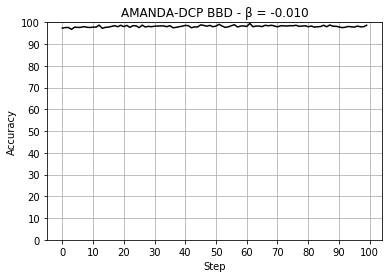

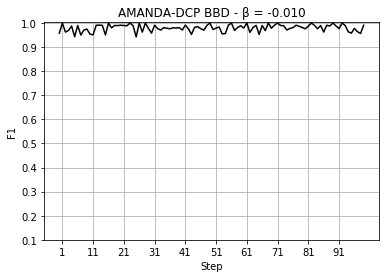

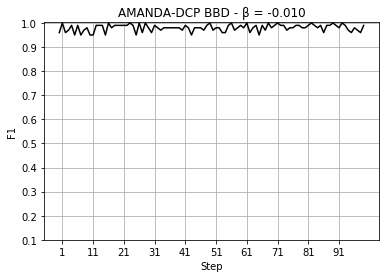




METHOD: lp as classifier and kde and BBD distance as dynamic CSE
AMANDA-DCP BBD - β = 1.010 | Mean keeping percentage=0.10 | Std keeping percentage=0.00
Execution time:  25.584950600000013
Average error: 1.9640000000000128
Average macro-F1: 0.9784255215952542
Average micro-F1: 0.9789999999999999
Average Accuracy:  98.03599999999999
Standard Deviation:  0.47007446218657734
Variance:  0.22096999999999992


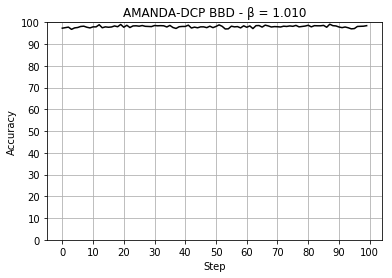

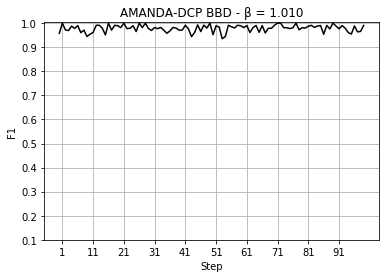

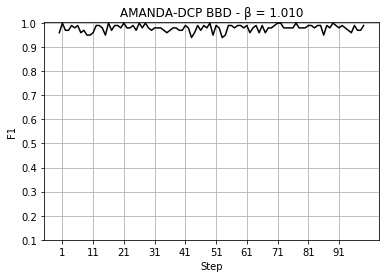




METHOD: lp as classifier and kde and BBD distance as dynamic CSE
AMANDA-DCP BBD - β = 1.500 | Mean keeping percentage=0.10 | Std keeping percentage=0.00
Execution time:  24.174690000000055
Average error: 1.9640000000000128
Average macro-F1: 0.9784255215952542
Average micro-F1: 0.9789999999999999
Average Accuracy:  98.03599999999999
Standard Deviation:  0.47007446218657734
Variance:  0.22096999999999992


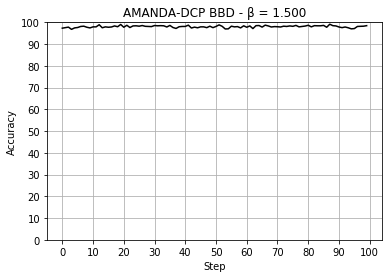

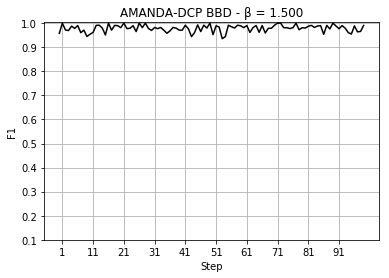

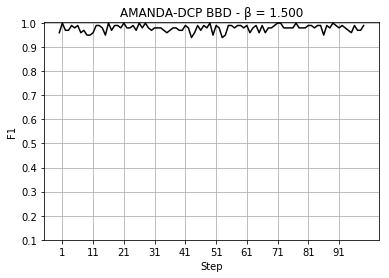




METHOD: lp as classifier and kde and BBD distance as dynamic CSE
AMANDA-DCP BBD - β = 2.000 | Mean keeping percentage=0.10 | Std keeping percentage=0.00
Execution time:  24.69281479999995
Average error: 1.9640000000000128
Average macro-F1: 0.9784255215952542
Average micro-F1: 0.9789999999999999
Average Accuracy:  98.03599999999999
Standard Deviation:  0.47007446218657734
Variance:  0.22096999999999992


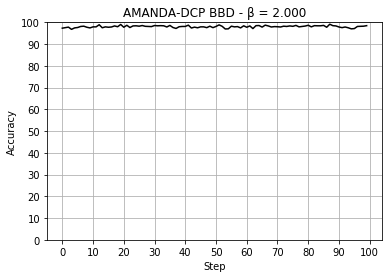

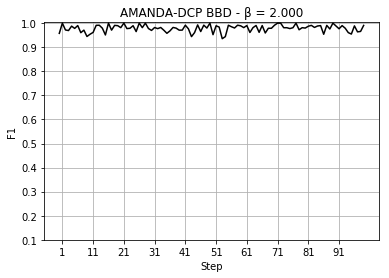

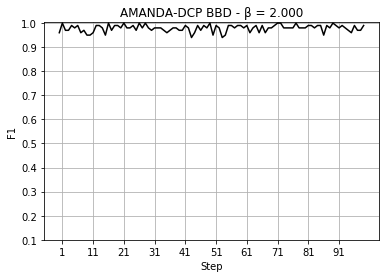




METHOD: lp as classifier and kde and BBD distance as dynamic CSE
AMANDA-DCP BBD - β = 10.000 | Mean keeping percentage=0.10 | Std keeping percentage=0.00
Execution time:  24.302803799999992
Average error: 1.9640000000000128
Average macro-F1: 0.9784255215952542
Average micro-F1: 0.9789999999999999
Average Accuracy:  98.03599999999999
Standard Deviation:  0.47007446218657734
Variance:  0.22096999999999992


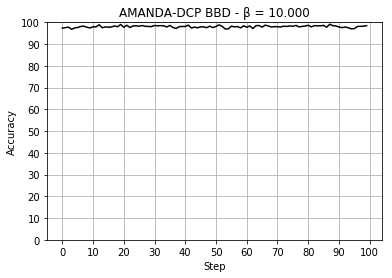

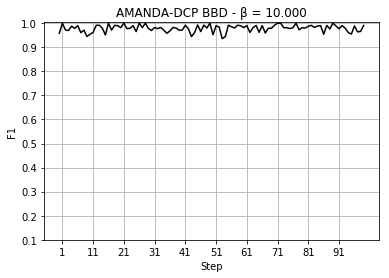

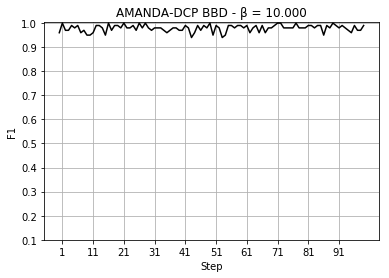

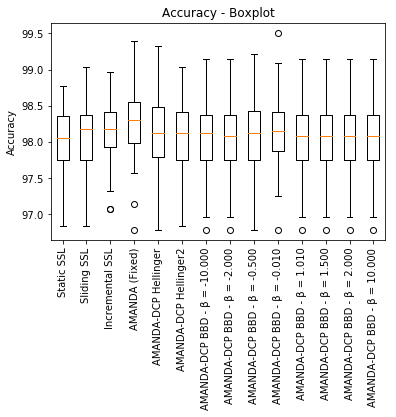

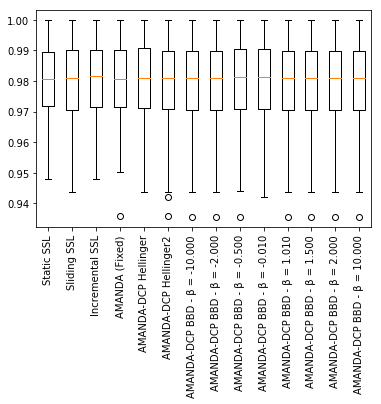

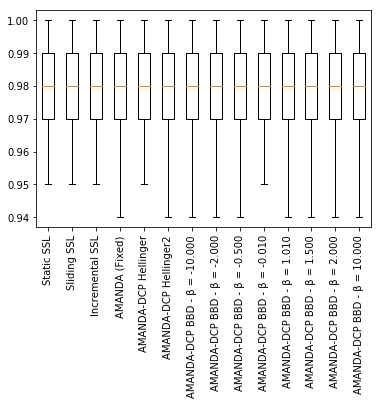

C:\Users\BRUNO\Anaconda3\envs\datascience36\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


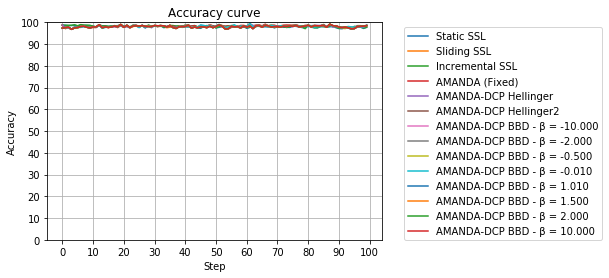

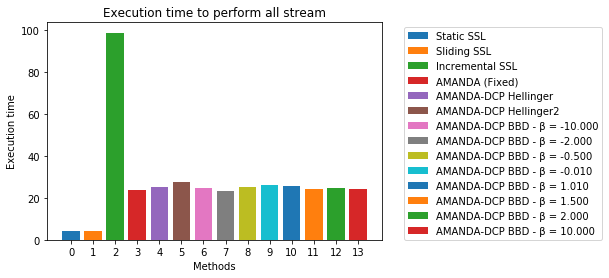

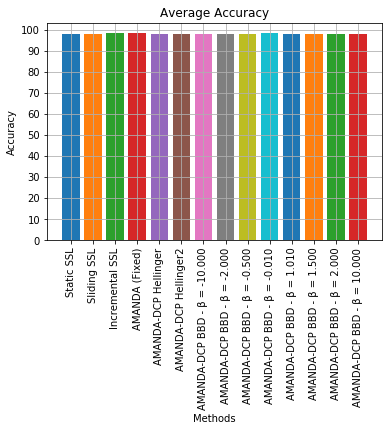

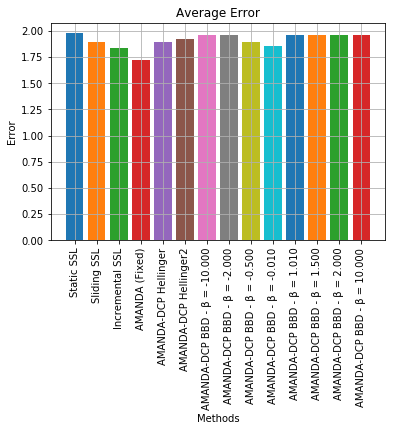

Error reduction: 0.08681635942581703
Error reduction: 0.14772043295957168
Error reduction: 0.2594289095416243
Error reduction: 0.08916274751845646
Error reduction: 0.05223263927850192
Error reduction: 0.01581261540656227
Error reduction: 0.018771104740709362
Error reduction: 0.08416392071248177
Error reduction: 0.12792915948294853
Error reduction: 0.013262193566792289
Error reduction: 0.013262193566792289
Error reduction: 0.013262193566792289
Error reduction: 0.013262193566792289


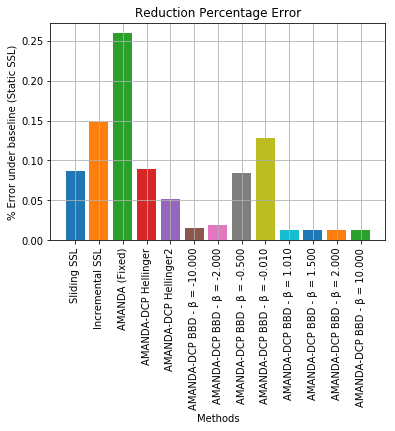

In [1]:
%matplotlib inline
import sys
import os
from pathlib import Path
os.chdir(Path(os.getcwd()).resolve().parents[3])

import setup
from methods import runExperiments
from methods import static_classifier
from methods import amanda_dynamic
from methods import amanda_fixed
from methods import incremental_LN
from methods import deslizante_LN
from methods import compose_gmm_version


class Experiment():
     def __init__(self, method, K=None, excludingPercentage=None, densityFunction=None, clfName=None, distanceMetric=None, beta=None):
        self.method = method
        self.clfName = clfName
        self.densityFunction=densityFunction
        self.excludingPercentage = excludingPercentage
        self.K_variation = K
        self.distanceMetric = distanceMetric
        self.beta = beta


def loadLevelResults(path, sep, key, steps):
    originalAccs, F1s, time = setup.loadLevelIwBoxplotResults(path, sep)
    predictions = F1s[key]
    predictions = [ predictions[i::steps] for i in range(steps) ]
    
    return predictions, originalAccs[key], time[key]


def main():
    experiments = {}
    is_windows = sys.platform.startswith('win')
    sep = '\\'

    if is_windows == False:
        sep = '/'

    path = os.getcwd()+sep+'data'+sep
    
    # SETTINGS
    sslClassifier = 'lp' # lp = label propagation, rf = random forests, cl = cluster and label, knn = k-nn, svm = svm
    steps = 100
    poolSize = None
    isBatchMode = True # False = Stream
    isBinaryClassification = False
    isImbalanced = False
    externalResults = []
    
    # Load dataset
    dataValues, dataLabels, description = setup.load4CE1CF(path, sep)
    
    # Only 5% of initial labeled data - Extreme verification latency scenario
    labeledData = int(0.05*len(dataLabels))

    # Static SSL
    experiments[0] = Experiment(static_classifier, 5, clfName=sslClassifier)
    
    # Sliding SSL
    experiments[1] = Experiment(deslizante_LN, 5, clfName=sslClassifier)
    
    # Incremental SSL
    experiments[2] = Experiment(incremental_LN, 5, clfName=sslClassifier)
    
    # Proposed Method 1 (AMANDA - Fixed core extraction percentage)
    experiments[3] = Experiment(amanda_fixed, 5, 0.8, "kde", sslClassifier)

    # Proposed method 2 (AMANDA - DCP ORIGINAL)
    experiments[4] = Experiment(amanda_dynamic, 5, None, "kde", sslClassifier, 'Hellinger')
    
    # Proposed method 3 (AMANDA - DCP Hellinger2)
    experiments[5] = Experiment(amanda_dynamic, 9, None, "kde", sslClassifier, 'Hellinger2')                         
    
    # Proposed method 4 (AMANDA - DCP BBD)
    experiments[6] = Experiment(amanda_dynamic, 9, None, "kde", sslClassifier, 'BBD', beta=-10)
    
    # Proposed method 4 (AMANDA - DCP BBD)
    experiments[7] = Experiment(amanda_dynamic, 9, None, "kde", sslClassifier, 'BBD', beta=-2)
    
    # Proposed method 4 (AMANDA - DCP BBD)
    experiments[8] = Experiment(amanda_dynamic, 9, None, "kde", sslClassifier, 'BBD', beta=-0.5)
    
    # Proposed method 4 (AMANDA - DCP BBD)
    experiments[9] = Experiment(amanda_dynamic, 9, None, "kde", sslClassifier, 'BBD', beta=-0.01)  
    
    # Proposed method 4 (AMANDA - DCP BBD)
    experiments[10] = Experiment(amanda_dynamic, 9, None, "kde", sslClassifier, 'BBD', beta=1.01)        
    
    # Proposed method 4 (AMANDA - DCP BBD)
    experiments[11] = Experiment(amanda_dynamic, 9, None, "kde", sslClassifier, 'BBD', beta=1.5)
    
    # Proposed method 4 (AMANDA - DCP BBD)
    experiments[12] = Experiment(amanda_dynamic, 9, None, "kde", sslClassifier, 'BBD', beta=2)
    
    # Proposed method 4 (AMANDA - DCP BBD)
    experiments[13] = Experiment(amanda_dynamic, 9, None, "kde", sslClassifier, 'BBD', beta=10)

    # COMPOSE GMM (Python version)
    #experiments[5] = Experiment(compose_gmm_version, 5)
    
    # levelIw matlab results
    #predictionsLevelIw, originalAccsLevelIw, timeLevelIw = loadLevelResults(path, sep, '4CE1CF', steps)
    #externalResults.append({"name":"Level IW", "predictions":predictionsLevelIw, "accuracies":originalAccsLevelIw, "time":timeLevelIw})
    
    # Run experiments
    runExperiments.run(dataValues, dataLabels, description, isBinaryClassification, isImbalanced, 
                       experiments, steps, labeledData, isBatchMode, poolSize, externalResults)
    

if __name__ == "__main__":
    main()